In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''




## Bayesian Belief Networks

The methods we have described up to now are fairly general — all that we assumed, at base, was that we could parameterize the distributions by a feature vector $ \theta $. If we had prior information about the distribution of $ \theta $, this too could be used. Sometimes our knowledge about a distribution is not directly of this type, but instead about the statistical dependencies (or independencies) among the component features.

Recall that for some multidimensional distribution $ p(x) $, if for two features we have 

$$
p(x_i , x_j ) = p(x_i )p(x_j ),
$$

we say those variables are statistically independent (Fig.6).

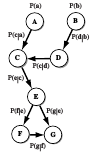

Fig.6: A three-dimensional distribution which obeys p(x1 , x3 ) = p(x1 )p(x3 ); thus here x1 and x3 are statistically independent but the other feature pairs are not.

In this example, $ x_1 $ and $ x_3 $ are statistically independent but the other feature pairs are not.

There are many cases where we know or can safely assume which variables are or are not independent, even without sampled data. For instance, when describing the state of an automobile — temperature of the engine, pressures of the fluids and in the tires, voltages in the wires, etc. — we know that the oil pressure in the engine and the air pressure in a tire are functionally unrelated, hence they can be safely assumed to be statistically independent. However, the oil temperature and engine temperature are not independent (but could be conditionally independent).

We represent these dependencies graphically, by means of **Bayesian belief networks**, also called **causal networks**, or simply **belief nets**. They take the topological form of a directed acyclic graph (DAG), where each link is directional, and there are no loops. 

While such nets can represent continuous multidimensional distributions, they have enjoyed greatest application and success for discrete variables. For this reason, and because the formal properties are simpler, we shall concentrate on the discrete case.

### Example of a Belief Network

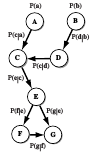

Fig.7: A belief network consists of nodes (labelled with upper case bold letters) and their associated discrete states (in lower-case). Thus node A has states a1 , a2 , ..., denoted simply a; node B has states b1 , b2 , ..., denoted b, and so forth. The links between nodes represent conditional probabilities. For example, P (c|a) can be
described by a matrix whose entries are $P (c_i |a_j )$.

A belief network consists of nodes (labelled with upper case bold letters) and their associated discrete states (in lower-case). Thus node $ A $ has states $ a_1 , a_2 , ... $, denoted simply $ a $; node $ B $ has states $ b_1 , b_2 , ... $, denoted $ b $, and so forth.

The links between nodes represent conditional probabilities. For example, $ P(c|a) $ can be described by a matrix whose entries are $ P(c_i | a_j) $.

Each node (or unit) represents one of the system variables, and here takes on discrete values. While there are a discrete number of possible values of node $ A $ — here two, $ a_1 $ and $ a_2 $ — there may be continuous-valued probabilities on these discrete states. For example, if node $ A $ represents the state of a binary lamp switch — $ a_1 = \text{on}, a_2 = \text{off} $ — we might have $ P(a_1) = 0.739, P(a_2) = 0.261 $.

### Bayesian Inference

Suppose we have a belief net, complete with conditional probabilities, and know the values or probabilities of some of the states. Through careful application of Bayes' rule or Bayesian inference, we will be able to determine the maximum posterior value of the unknown variables in the net.

We first consider how to determine the state of just one node from the states in units with which it is connected. The connected nodes are the only ones we need to consider directly — the others are conditionally independent.

In considering a single node $ X $ in the simple net, it is extremely useful to distinguish the set of nodes before $ X $ — called its parents $ P $ — and the set of those parents after it — called its children $ C $.

The belief of a set of propositions $ x = (x_1 , x_2 , ...) $ on node $ X $ describes the relative belief probabilities of the variables given all the evidence $ e $ throughout the rest of the network, i.e.,

$$
P(x|e).
$$

We can divide the dependency of the belief upon the parents and the children in the following way:

$$
P(x|e) \propto P(e_C |x)P(x|e_P),
$$

where $ e $ represents all evidence (i.e., values of variables on nodes other than $ X $), $ e_P $ the evidence on the parent nodes, and $ e_C $ the children nodes.

### Conditional Independence

The first term in the above equation is quite simple, and is a manifestation of Bayes’ formula. We can expand the dependency upon the evidence of the children nodes as follows:

$$
P(e_C |x) = P(e_{C1}, e_{C2}, ..., e_{C|C|} |x) = P(e_{C1} |x)P(e_{C2} |x) \cdots P(e_{C|C|} |x) = P(e_{C_j} |x),
$$

where $ C_j $ represents the $ j $-th child node.

Incorporating evidence from parent nodes is more subtle. We have:

$$
P(x|e_P) = P(x|e_{P_1}, e_{P_2}, ..., e_{P|P|}) = P(x|P_{1i}, P_{2j}, ..., P_{|P|k})P(P_{1i}, P_{2j}, ..., P_{|P|k}|e_{P_1}, ..., e_{P|P|}),
$$

where the summation is over all possible conﬁgurations of values on the different parent nodes. 

### General Case

Putting these results together for the general case with $ |P| $ parent nodes and $ |C| $ children nodes, we find:

$$
P(x|e) \propto P(e_C |x) \prod_{j=1}^{|C|} P(x|P_{mn}) \prod_{i=1}^{|P|} P(P_i |e_{P_i}).
$$

In words, the probability of particular values for node $ X $ is the product of two factors. The first is due to the children (the product of their independent likelihoods). The second is the sum over all possible conﬁgurations of states on the parent nodes of the prior probabilities of their values and the conditional probabilities of the $ x $ variables given those parent values. The final values must be normalized to represent probabilities.
# Bayesian Belief Networks

The methods we have described up to now are fairly general — all that we assumed, at base, was that we could parameterize the distributions by a feature vector $ \theta $. If we had prior information about the distribution of $ \theta $, this too could be used. Sometimes our knowledge about a distribution is not directly of this type, but instead about the statistical dependencies (or independencies) among the component features.

Recall that for some multidimensional distribution $ p(x) $, if for two features we have 

$$
p(x_i , x_j ) = p(x_i )p(x_j ),
$$

we say those variables are statistically independent (Fig. 3.6).

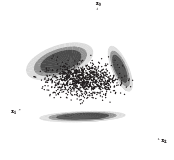
In this example, $ x_1 $ and $ x_3 $ are statistically independent but the other feature pairs are not.

There are many cases where we know or can safely assume which variables are or are not independent, even without sampled data. For instance, when describing the state of an automobile — temperature of the engine, pressures of the fluids and in the tires, voltages in the wires, etc. — we know that the oil pressure in the engine and the air pressure in a tire are functionally unrelated, hence they can be safely assumed to be statistically independent. However, the oil temperature and engine temperature are not independent (but could be conditionally independent).

We represent these dependencies graphically, by means of **Bayesian belief networks**, also called **causal networks**, or simply **belief nets**. They take the topological form of a directed acyclic graph (DAG), where each link is directional, and there are no loops. 

While such nets can represent continuous multidimensional distributions, they have enjoyed greatest application and success for discrete variables. For this reason, and because the formal properties are simpler, we shall concentrate on the discrete case.

### Example of a Belief Network

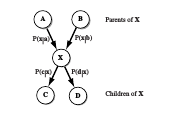

Fig.8: A portion of a belief network, consistsing of a node X, having variable values (x1 , x2 , ...), its parents (A and B), and its children (C and D).


A belief network consists of nodes (labelled with upper case bold letters) and their associated discrete states (in lower-case). Thus node $ A $ has states $ a_1 , a_2 , ... $, denoted simply $ a $; node $ B $ has states $ b_1 , b_2 , ... $, denoted $ b $, and so forth.

The links between nodes represent conditional probabilities. For example, $ P(c|a) $ can be described by a matrix whose entries are $ P(c_i | a_j) $.

Each node (or unit) represents one of the system variables, and here takes on discrete values. While there are a discrete number of possible values of node $ A $ — here two, $ a_1 $ and $ a_2 $ — there may be continuous-valued probabilities on these discrete states. For example, if node $ A $ represents the state of a binary lamp switch — $ a_1 = \text{on}, a_2 = \text{off} $ — we might have $ P(a_1) = 0.739, P(a_2) = 0.261 $.

### Bayesian Inference

Suppose we have a belief net, complete with conditional probabilities, and know the values or probabilities of some of the states. Through careful application of Bayes' rule or Bayesian inference, we will be able to determine the maximum posterior value of the unknown variables in the net.

We first consider how to determine the state of just one node from the states in units with which it is connected. The connected nodes are the only ones we need to consider directly — the others are conditionally independent.

In considering a single node $ X $ in the simple net, it is extremely useful to distinguish the set of nodes before $ X $ — called its parents $ P $ — and the set of those parents after it — called its children $ C $.

The belief of a set of propositions $ x = (x_1 , x_2 , ...) $ on node $ X $ describes the relative belief probabilities of the variables given all the evidence $ e $ throughout the rest of the network, i.e.,

$$
P(x|e).
$$

We can divide the dependency of the belief upon the parents and the children in the following way:

$$
P(x|e) \propto P(e_C |x)P(x|e_P),
$$

where $ e $ represents all evidence (i.e., values of variables on nodes other than $ X $), $ e_P $ the evidence on the parent nodes, and $ e_C $ the children nodes.

### Conditional Independence

The first term in the above equation is quite simple, and is a manifestation of Bayes’ formula. We can expand the dependency upon the evidence of the children nodes as follows:

$$
P(e_C |x) = P(e_{C1}, e_{C2}, ..., e_{C|C|} |x) = P(e_{C1} |x)P(e_{C2} |x) \cdots P(e_{C|C|} |x) = P(e_{C_j} |x),
$$

where $ C_j $ represents the $ j $-th child node.

Incorporating evidence from parent nodes is more subtle. We have:

$$
P(x|e_P) = P(x|e_{P_1}, e_{P_2}, ..., e_{P|P|}) = P(x|P_{1i}, P_{2j}, ..., P_{|P|k})P(P_{1i}, P_{2j}, ..., P_{|P|k}|e_{P_1}, ..., e_{P|P|}),
$$

where the summation is over all possible conﬁgurations of values on the different parent nodes. 

### General Case

Putting these results together for the general case with $ |P| $ parent nodes and $ |C| $ children nodes, we find:

$$
P(x|e) \propto P(e_C |x) \prod_{j=1}^{|C|} P(x|P_{mn}) \prod_{i=1}^{|P|} P(P_i |e_{P_i}).
$$

In words, the probability of particular values for node $ X $ is the product of two factors. The first is due to the children (the product of their independent likelihoods). The second is the sum over all possible conﬁgurations of states on the parent nodes of the prior probabilities of their values and the conditional probabilities of the $ x $ variables given those parent values. The final values must be normalized to represent probabilities.


In [1]:
class Node:
    def __init__(self, name, states, parents=None, probabilities=None):
        """
        Initialize a node in the Bayesian Belief Network.

        Parameters:
        - name: The name of the node.
        - states: A list of possible states for the node.
        - parents: A list of parent nodes.
        - probabilities: A dictionary of conditional probabilities.
        """
        self.name = name
        self.states = states
        self.parents = parents if parents else []
        self.probabilities = probabilities if probabilities else {}

    def get_probability(self, state, evidence):
        """
        Get the probability of the node being in a specific state given the evidence.

        Parameters:
        - state: The state for which the probability is calculated.
        - evidence: A dictionary of known states for the parent nodes.

        Returns:
        - Probability of the node being in the specified state.
        """
        if not self.parents:  # No parents, return prior probability
            return self.probabilities[state]

        # Get the parent states as a tuple to access the conditional probability
        parent_states = tuple(evidence[parent.name] for parent in self.parents)
        return self.probabilities[parent_states][state]


class BayesianNetwork:
    def __init__(self):
        """Initialize the Bayesian Network."""
        self.nodes = []

    def add_node(self, node):
        """
        Add a node to the Bayesian Network.

        Parameters:
        - node: An instance of the Node class.
        """
        self.nodes.append(node)

    def inference(self, evidence):
        """
        Perform inference on the Bayesian Network given some evidence.

        Parameters:
        - evidence: A dictionary of known states for some nodes.

        Returns:
        - A dictionary of probabilities for each node given the evidence.
        """
        results = {}
        for node in self.nodes:
            # Skip nodes for which we already have evidence
            if node.name in evidence:
                continue
            
            # Compute the probability of each state for the node
            probabilities = {}
            for state in node.states:
                probabilities[state] = node.get_probability(state, evidence)
            
            # Normalize probabilities to ensure they sum to 1
            total = sum(probabilities.values())
            for state in probabilities:
                probabilities[state] /= total
            
            results[node.name] = probabilities
        
        return results


# Example usage:
if __name__ == "__main__":
    # Create nodes
    A = Node(name='A', states=['a1', 'a2'], probabilities={'a1': 0.6, 'a2': 0.4})
    B = Node(name='B', states=['b1', 'b2'], probabilities={'b1': 0.7, 'b2': 0.3})
    C = Node(
        name='C',
        states=['c1', 'c2'],
        parents=[A, B],
        probabilities={
            ('a1', 'b1'): {'c1': 0.9, 'c2': 0.1},
            ('a1', 'b2'): {'c1': 0.8, 'c2': 0.2},
            ('a2', 'b1'): {'c1': 0.5, 'c2': 0.5},
            ('a2', 'b2'): {'c1': 0.2, 'c2': 0.8}
        }
    )

    # Create the Bayesian Network
    bbn = BayesianNetwork()
    bbn.add_node(A)
    bbn.add_node(B)
    bbn.add_node(C)

    # Define evidence
    evidence = {'A': 'a1', 'B': 'b1'}

    # Perform inference
    results = bbn.inference(evidence)

    # Display results
    print("Posterior probabilities given evidence:", results)


Posterior probabilities given evidence: {'C': {'c1': 0.9, 'c2': 0.1}}


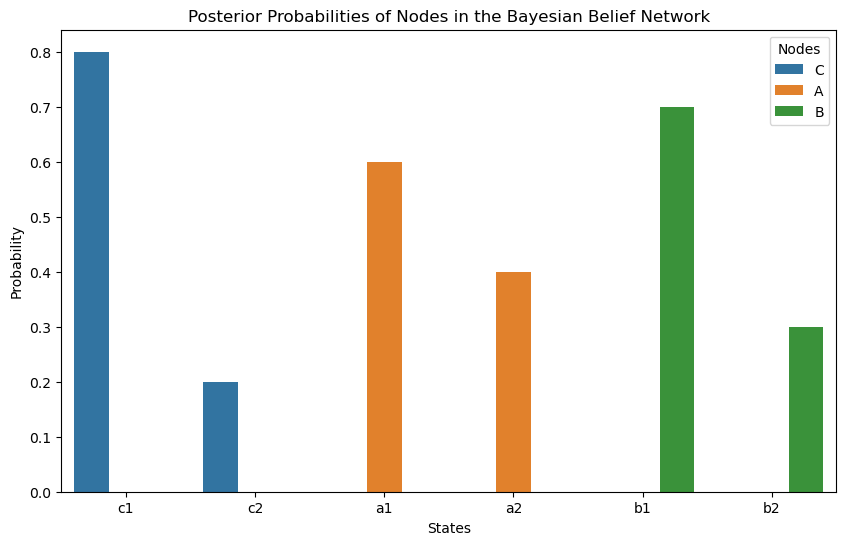

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the inference results from the previous implementation
# results = {'C': {'c1': 0.9, 'c2': 0.1}}  # Sample output from inference
# For demonstration, let's create a sample results dictionary
results = {
    'C': {'c1': 0.8, 'c2': 0.2},
    'A': {'a1': 0.6, 'a2': 0.4},
    'B': {'b1': 0.7, 'b2': 0.3}
}

# Prepare data for plotting
plot_data = []
for node, probs in results.items():
    for state, prob in probs.items():
        plot_data.append({'Node': node, 'State': state, 'Probability': prob})

# Create a DataFrame from the plot_data
import pandas as pd
df = pd.DataFrame(plot_data)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.barplot(x='State', y='Probability', hue='Node', data=df)

# Set plot title and labels
plt.title('Posterior Probabilities of Nodes in the Bayesian Belief Network')
plt.xlabel('States')
plt.ylabel('Probability')
plt.legend(title='Nodes')

# Show the plot
plt.show()


## Bayesian Belief Networks (BBNs)

A given belief net can be used to infer any of the unknown variables. For instance, in a scenario involving a fish, we might use information about the time of year, fishing location, and some measured properties of the fish to infer its identity (e.g., salmon or sea bass). The same network could instead be used to infer the probability that a fish is thin or dark in color based on the probabilities of the fish's identity, time of year, and other factors.

When the dependency relationships among the features used by a classifier are unknown, we generally proceed by taking the simplest assumption: that the features are conditionally independent given the category. This can be mathematically expressed as:

$$
p(\omega_k | x) \propto \prod_{i=1}^{d} p(x_i | \omega_k).
$$

This assumption leads to the so-called *naive Bayes rule* (sometimes referred to as *idiot Bayes rule*), which often works surprisingly well in practice. The naive Bayes classifier can be represented by a very simple belief net.

In a more complex belief net where multiple nodes may have unknown values, we may need to visit nodes randomly and update their probabilities iteratively until the entire configuration stabilizes. Under weak conditions, it can be shown that this process will converge to consistent values for all variables throughout the network.

## Applications of Belief Nets

Belief nets have found increasing use in complex problems such as medical diagnosis. In these cases, the upper-most nodes (those without parents) represent fundamental biological agents, such as the presence of a virus or bacteria. Intermediate nodes describe diseases (e.g., flu or emphysema), and the lower-most nodes represent symptoms (e.g., high temperature or coughing).

A physician can enter measured values into the net and determine the most likely disease or cause of the symptoms. Moreover, belief nets can automatically compute which unknown variable (node) should be measured to best reveal the identity of the disease.

We will return to address the problem of learning in such belief net models in Chapter ??.


In [3]:
# Bayesian Belief Network Implementation

class Node:
    def __init__(self, name, states, prior=None):
        self.name = name
        self.states = states  # Possible states of the node
        self.prior = prior if prior else {state: 1/len(states) for state in states}  # Prior probabilities
        self.parents = []  # List of parent nodes
        self.conditional_probabilities = {}  # Conditional probabilities for child given parent states

    def add_parent(self, parent):
        """Add a parent node."""
        self.parents.append(parent)

    def set_conditional_probabilities(self, probabilities):
        """Set conditional probabilities for this node given its parents."""
        self.conditional_probabilities = probabilities

    def get_probability(self, state, evidence):
        """Compute the probability of a state given the evidence."""
        if not self.parents:  # If no parents, return prior
            return self.prior[state]
        
        # If there are parents, we need to calculate conditional probability
        prob = 1.0
        for parent in self.parents:
            prob *= parent.get_probability(evidence[parent.name], evidence)  # Get parent's state
        
        # Multiply by the conditional probability of this node given its parents
        prob *= self.conditional_probabilities.get(tuple(evidence[parent.name] for parent in self.parents), {}).get(state, 0)
        return prob

def infer_bbn(nodes, evidence):
    """Infer the probabilities of the unknown nodes given the evidence."""
    results = {}
    
    for node in nodes:
        if node.name not in evidence:  # Only calculate for unknown nodes
            total_prob = sum(node.get_probability(state, evidence) for state in node.states)
            results[node.name] = {state: node.get_probability(state, evidence) / total_prob for state in node.states}

    return results

# Example Usage
if __name__ == "__main__":
    # Define nodes
    A = Node("A", states=["True", "False"], prior={"True": 0.7, "False": 0.3})
    B = Node("B", states=["True", "False"], prior={"True": 0.6, "False": 0.4})
    C = Node("C", states=["True", "False"])

    # Set conditional probabilities for C given A and B
    C.set_conditional_probabilities({
        ("True", "True"): {"True": 0.9, "False": 0.1},
        ("True", "False"): {"True": 0.8, "False": 0.2},
        ("False", "True"): {"True": 0.7, "False": 0.3},
        ("False", "False"): {"True": 0.1, "False": 0.9}
    })

    # Add parents to C
    C.add_parent(A)
    C.add_parent(B)

    # Evidence (known states)
    evidence = {"A": "True", "B": "False"}

    # Infer probabilities
    results = infer_bbn([A, B, C], evidence)

    # Display results
    for node, probs in results.items():
        print(f"Probability of node {node}:")
        for state, prob in probs.items():
            print(f"  {state}: {prob:.4f}")


Probability of node C:
  True: 0.8000
  False: 0.2000


Probability of node C:
  True: 0.8000
  False: 0.2000


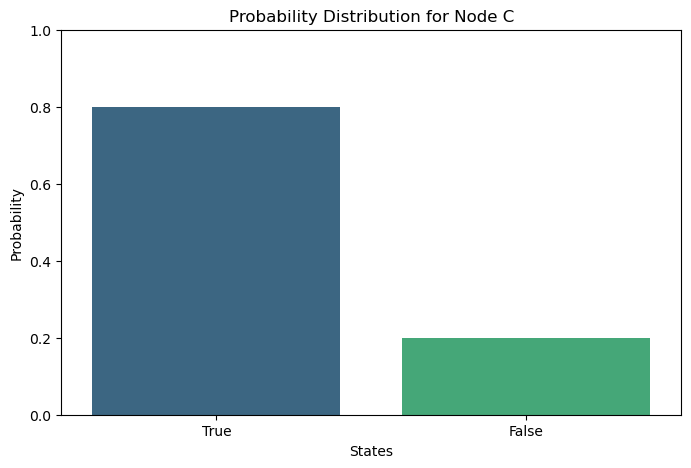

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name, states, prior=None):
        self.name = name
        self.states = states  # Possible states of the node
        self.prior = prior if prior else {state: 1/len(states) for state in states}  # Prior probabilities
        self.parents = []  # List of parent nodes
        self.conditional_probabilities = {}  # Conditional probabilities for child given parent states

    def add_parent(self, parent):
        """Add a parent node."""
        self.parents.append(parent)

    def set_conditional_probabilities(self, probabilities):
        """Set conditional probabilities for this node given its parents."""
        self.conditional_probabilities = probabilities

    def get_probability(self, state, evidence):
        """Compute the probability of a state given the evidence."""
        if not self.parents:  # If no parents, return prior
            return self.prior[state]
        
        # If there are parents, we need to calculate conditional probability
        prob = 1.0
        for parent in self.parents:
            prob *= parent.get_probability(evidence[parent.name], evidence)  # Get parent's state
        
        # Multiply by the conditional probability of this node given its parents
        prob *= self.conditional_probabilities.get(tuple(evidence[parent.name] for parent in self.parents), {}).get(state, 0)
        return prob

def infer_bbn(nodes, evidence):
    """Infer the probabilities of the unknown nodes given the evidence."""
    results = {}
    
    for node in nodes:
        if node.name not in evidence:  # Only calculate for unknown nodes
            total_prob = sum(node.get_probability(state, evidence) for state in node.states)
            results[node.name] = {state: node.get_probability(state, evidence) / total_prob for state in node.states}

    return results

def plot_probabilities(results):
    """Plot the probabilities of the nodes."""
    for node, probs in results.items():
        states = list(probs.keys())
        probabilities = list(probs.values())

        plt.figure(figsize=(8, 5))
        sns.barplot(x=states, y=probabilities, palette='viridis')
        plt.title(f'Probability Distribution for Node {node}')
        plt.xlabel('States')
        plt.ylabel('Probability')
        plt.ylim(0, 1)
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Define nodes
    A = Node("A", states=["True", "False"], prior={"True": 0.7, "False": 0.3})
    B = Node("B", states=["True", "False"], prior={"True": 0.6, "False": 0.4})
    C = Node("C", states=["True", "False"])

    # Set conditional probabilities for C given A and B
    C.set_conditional_probabilities({
        ("True", "True"): {"True": 0.9, "False": 0.1},
        ("True", "False"): {"True": 0.8, "False": 0.2},
        ("False", "True"): {"True": 0.7, "False": 0.3},
        ("False", "False"): {"True": 0.1, "False": 0.9}
    })

    # Add parents to C
    C.add_parent(A)
    C.add_parent(B)

    # Evidence (known states)
    evidence = {"A": "True", "B": "False"}

    # Infer probabilities
    results = infer_bbn([A, B, C], evidence)

    # Display results
    for node, probs in results.items():
        print(f"Probability of node {node}:")
        for state, prob in probs.items():
            print(f"  {state}: {prob:.4f}")

    # Plot probabilities
    plot_probabilities(results)
